In [142]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, hstack
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import fits

from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

## Load SMASH data

In [3]:
# DECam extinction coefficients: https://www.legacysurvey.org/dr8/catalogs/#galactic-extinction-coefficients
bands = ['u', 'g', 'r', 'i', 'z', 'Y']
ax = np.array([3.995, 3.214, 2.165, 1.592, 1.211, 1.064])
axd = {k: ax[i] for i, k in enumerate(bands)}

In [4]:
t = Table.read('../data/smash_full.csv')

In [5]:
# # correct extinction
# for k in bands[:-1]:
#     t[f'{k}mag'] = t[f'{k}mag'] - axd[k] * t['ebv']

In [6]:
t

glon,glat,elon,elat,ring256,htm9,nest4096,random_id,decscatter,rascatter,id,ra,dec,raerr,decerr,ndet,depthflag,umag,uerr,uscatter,ndetu,gmag,gerr,gscatter,ndetg,rmag,rerr,rscatter,ndetr,imag,ierr,iscatter,ndeti,zmag,zerr,zscatter,ndetz,chi,sharp,flag,prob,ebv
float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,str16,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64
280.49611445005866,-32.191702854109295,305.1007079862598,-85.74743786691229,762552,2166862,135565528,4.112771,99.99,99.99,47553.3250660,82.87306507330564,-69.89901570162836,0.271733,0.271733,1,1,99.99,9.99,99.99,0,6.630071,0.421106,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,54.152,-0.001,-1,99.99,0.629188
280.4834776187176,-32.192968310159664,305.1936723106278,-85.75571650964964,762552,2166862,135565529,60.61237,99.99,99.99,47553.3250189,82.87416517347823,-69.88825363123739,0.281867,0.281867,1,1,99.99,9.99,99.99,0,6.980071,0.437206,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,54.954,-0.053,-1,99.99,0.642819
280.48343492325955,-32.20205290345313,305.2966983430976,-85.75078443712073,762552,2166862,135565530,8.254305,0.087127,0.187917,47553.2258815,82.84807087831823,-69.88683289986605,0.063376,0.063376,5,1,99.99,9.99,99.99,0,7.480116,0.459319,99.99,1,22.011728,0.089527,99.99,1,21.1805,0.089863,99.99,1,21.42582,0.097783,0.094253,2,4.9248,0.3484,-1,99.99,0.621523
280.45162859425454,-32.199318105551264,305.46548680161544,-85.77479112234245,762552,2166863,135565535,5.653764,0.065647,0.135815,47553.2984870,82.86784358322896,-69.86064972171798,0.064715,0.064715,5,3,99.99,9.99,99.99,0,7.487107,0.438274,99.99,1,20.611496,0.089586,99.99,1,21.754045,0.094736,0.504162,2,21.63762,0.095399,99.99,1,13.5168,-0.5838,0,0.52,0.65635
280.40665087698443,-32.201059575252884,305.7715030237264,-85.80556345747827,762113,2166863,135565710,65.34971,99.99,99.99,47553.3246384,82.87960877877462,-69.82276649027979,0.172571,0.172571,1,1,99.99,9.99,99.99,0,8.157071,0.262309,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,49.39,-0.064,-1,99.99,0.71349
280.46943437735024,-32.192358736631554,305.2745671202256,-85.76600486675153,762552,2166862,135565532,8.350331,99.99,99.99,47553.3249549,82.88117317011462,-69.87660043011567,0.206819,0.206819,1,1,99.99,9.99,99.99,0,8.201072,0.317508,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,79.629,-0.072,-1,99.99,0.661603
280.4457908018811,-32.19805138164828,305.48800809029314,-85.77961375287508,762552,2166863,135565533,35.885983,0.144398,0.091005,47553.3090505,82.87365987961958,-69.85595965823684,0.091375,0.091375,2,3,99.99,9.99,99.99,0,8.424071,0.117121,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,21.434813,0.430404,99.99,1,4.485,1.487,2,0.24,0.66716
280.50657109208277,-32.201008236112585,305.1409725017396,-85.73494992281384,762552,2166862,135565519,92.04672,99.99,99.99,47553.3250955,82.84237007408917,-69.90633992551282,0.180357,0.180357,1,1,99.99,9.99,99.99,0,8.592072,0.274909,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,40.09,0.723,-1,99.99,0.593774
280.50257823321294,-32.20173051240742,305.1738760904929,-85.73738969727457,762552,2166862,135565519,15.41965,99.99,99.99,47553.3250824,82.8417967918801,-69.90289052590637,0.11394,0.11394,1,1,99.99,9.99,99.99,0,8.606071,0.165615,99.99,1,99.99,9.99,99.99,0,99.99,9.99,99.99,0,99.99,9.99,99.99,0,42.708,0.346,-1,99.99,0.597287


In [7]:
print(t.colnames)

['glon', 'glat', 'elon', 'elat', 'ring256', 'htm9', 'nest4096', 'random_id', 'decscatter', 'rascatter', 'id', 'ra', 'dec', 'raerr', 'decerr', 'ndet', 'depthflag', 'umag', 'uerr', 'uscatter', 'ndetu', 'gmag', 'gerr', 'gscatter', 'ndetg', 'rmag', 'rerr', 'rscatter', 'ndetr', 'imag', 'ierr', 'iscatter', 'ndeti', 'zmag', 'zerr', 'zscatter', 'ndetz', 'chi', 'sharp', 'flag', 'prob', 'ebv']


In [8]:
np.sum(np.abs(t['sharp'])<0.7)

np.int64(8158314)

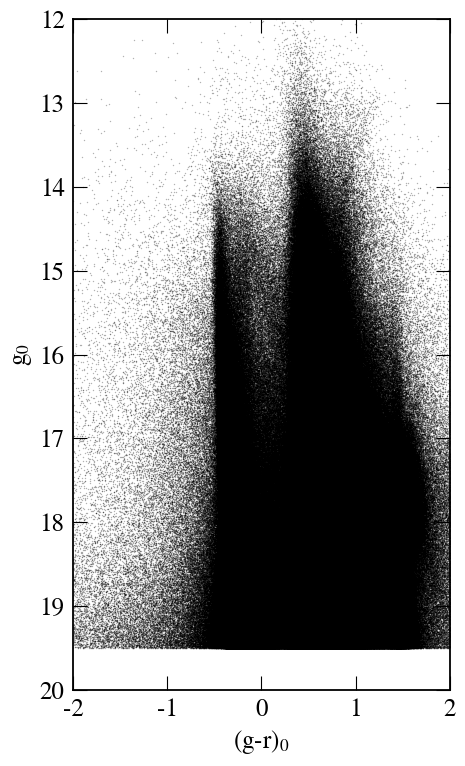

In [9]:
plt.figure(figsize=(5,8))
plt.plot(t['gmag'] - t['rmag'], t['gmag'], 'ko', ms=1, mew=0, alpha=0.3)

plt.xlim(-2,2)
plt.ylim(20,12)

plt.xlabel('(g-r)$_0$')
plt.ylabel('g$_0$')

plt.tight_layout()

In [20]:
# DECam isochrones
iso = Table.read('../data/decam.1e7.-0.7.cmd', format='ascii.commented_header', delimiter=' ', header_start=12)
iso_old = Table.read('../data/decam.1e10.-2.5.cmd', format='ascii.commented_header', delimiter=' ', header_start=12)

# SDSS isochrones
iso_sdss = Table.read('../data/sdss.1e7.-0.7.cmd', format='ascii.commented_header', delimiter=' ', header_start=12)
iso_sdss_old = Table.read('../data/sdss.1e10.-2.5.cmd', format='ascii.commented_header', delimiter=' ', header_start=12)

In [11]:
iso

EEP,isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],DECam_u,DECam_g,DECam_r,DECam_i,DECam_z,DECam_Y,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
108,10000000.000000006,0.10057706755894905,0.10057694723717905,3.5318800249292526,4.329508110643012,-1.8071642864513973,-0.7,-0.662641,13.527314,11.566214,10.072241,9.233616,8.830258,8.69986,-1.0
109,10000000.000000006,0.10274375489462867,0.10274363188134902,3.5323665821416323,4.329399356820623,-1.7974786109327838,-0.7,-0.662641,13.498629,11.535782,10.042247,9.207819,8.806048,8.676181,-1.0
110,10000000.000000006,0.10651178282300429,0.10651165509286525,3.5331815297657103,4.328960818462269,-1.7805099483810949,-0.7,-0.662641,13.448677,11.482978,9.990231,9.162776,8.763639,8.634657,-1.0
111,10000000.000000006,0.11027873561813276,0.11027860310283585,3.5339931406950433,4.328465847663139,-1.763501986551848,-0.7,-0.662641,13.398615,11.430153,9.938252,9.117676,8.721135,8.593029,-1.0
112,10000000.000000006,0.11404465968509496,0.11404452231625417,3.5348031695728737,4.327917050919557,-1.746450149938941,-0.7,-0.662641,13.348413,11.377281,9.886287,9.072506,8.678525,8.551291,-1.0
113,10000000.000000006,0.11780971876952472,0.11780957647858983,3.535612334539568,4.3273157485021745,-1.7293523095688341,-0.7,-0.662641,13.298049,11.324336,9.834315,9.027257,8.635805,8.509434,-1.0
114,10000000.000000006,0.12157422781279238,0.12157408053081838,3.5364221935744,4.326662430449005,-1.7122016143948355,-0.7,-0.662641,13.247485,11.271278,9.782304,8.981907,8.592956,8.467442,-1.0
115,10000000.000000006,0.12533796268177586,0.12533781033988917,3.537234467664644,4.325961027145403,-1.6949959002122286,-0.7,-0.662641,13.196695,11.21808,9.730229,8.9364,8.549973,8.425311,-1.0
116,10000000.000000006,0.12910085488597228,0.1291006974152959,3.538048977894595,4.325214063870781,-1.6777386491756983,-0.7,-0.662641,13.145685,11.164749,9.678106,8.890778,8.506866,8.38305,-1.0


In [12]:
d_lmc = 49.6*u.kpc
dm = 5*np.log10(d_lmc.to(u.pc).value) - 5
print(dm)

18.477408382450985


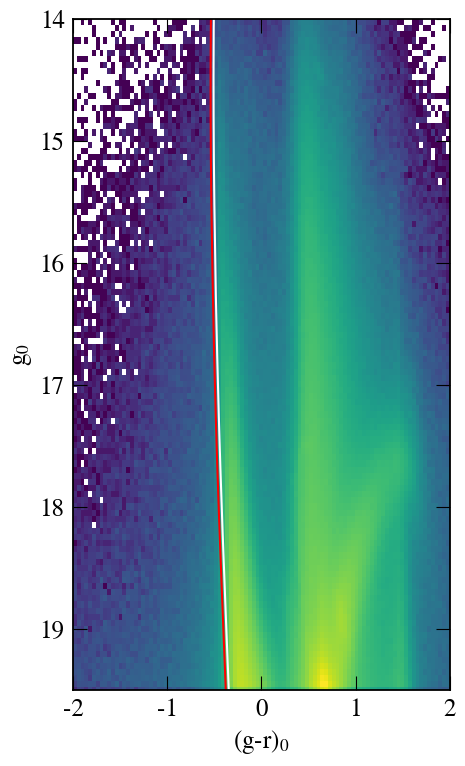

In [22]:
ind_finite = np.isfinite(t['gmag']) & np.isfinite(t['rmag'])
plt.figure(figsize=(5,8))
plt.hist2d(t['gmag'][ind_finite] - t['rmag'][ind_finite], t['gmag'][ind_finite], bins=(np.linspace(-2,2,100),np.linspace(14,24,200)), norm=mpl.colors.LogNorm())

plt.plot(iso['DECam_g']-iso['DECam_r'], iso['DECam_g']+dm, 'r-')
plt.plot(iso_sdss['SDSS_g']-iso_sdss['SDSS_r'], iso_sdss['SDSS_g']+dm, 'w-')

plt.xlim(-2,2)
plt.ylim(19.5,14)

plt.xlabel('(g-r)$_0$')
plt.ylabel('g$_0$')

plt.tight_layout()

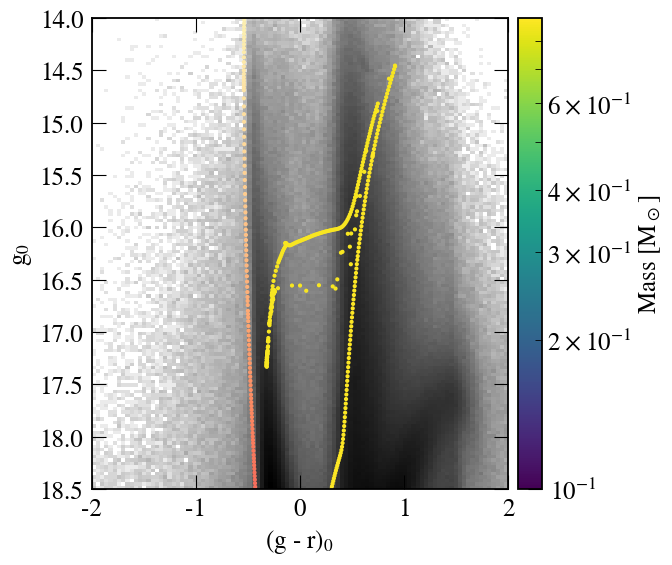

In [14]:
plt.figure(figsize=(7,6))

plt.hist2d(t['gmag'][ind_finite] - t['rmag'][ind_finite], t['gmag'][ind_finite], bins=(np.linspace(-2,2,100),np.linspace(12,18.5,200)), norm=mpl.colors.LogNorm(),
          cmap='binary')

plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_g']+dm, c=iso['star_mass'], cmap='magma', norm=mpl.colors.LogNorm(), s=4)
plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_g']+dm-2, c=iso_old['star_mass'], cmap='viridis', norm=mpl.colors.LogNorm(), s=4)

ind_mass = (iso['star_mass']>2.5) & (iso['star_mass']<4)
# plt.plot(iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], 'ro')

plt.xlim(-2,2)
plt.ylim(18.5,14)

# plt.xlim(-0.5,1)
# plt.ylim(0,-0.5)

plt.xlabel('(g - r)$_0$')
plt.ylabel('g$_0$')

plt.colorbar(label='Mass [$M_\odot$]', pad=0.02)

plt.tight_layout()

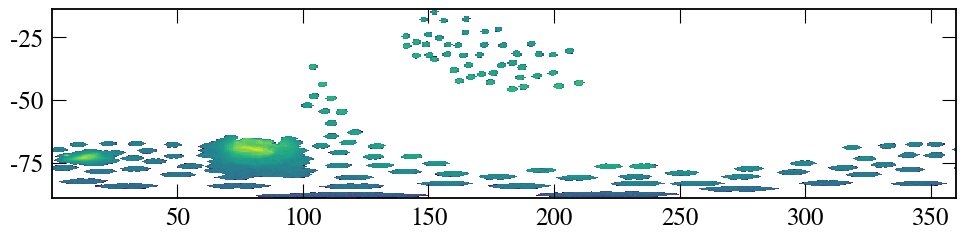

In [15]:
plt.figure(figsize=(10,10))

# plt.plot(t['ra'], t['dec'], 'ko', ms=1, mew=0, alpha=0.05)
plt.hist2d(t['ra'], t['dec'], bins=(500,500), norm=mpl.colors.LogNorm())

plt.gca().set_aspect('equal')
plt.tight_layout()

### DECam isochrones

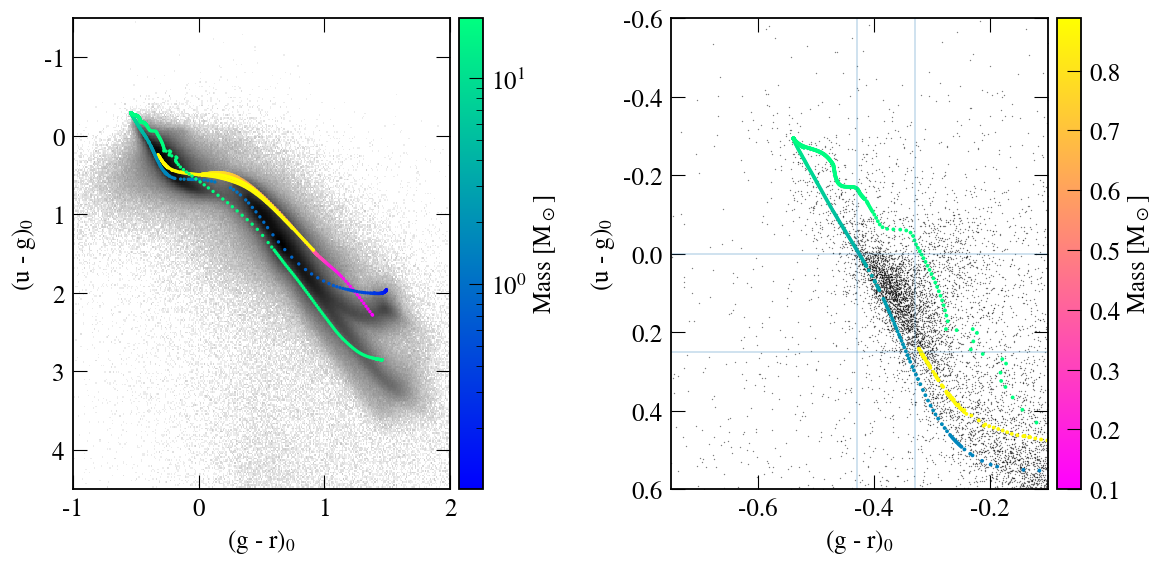

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

plt.sca(ax[0])
plt.hist2d(t['gmag'][ind_finite]- t['rmag'][ind_finite], t['umag'][ind_finite]-0.3 - t['gmag'][ind_finite], 
           bins=(np.linspace(-1,2,300),np.linspace(-1.5,4.5,300)), norm=mpl.colors.LogNorm(), cmap='binary')

plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_u']-iso_old['DECam_g'], cmap='spring', s=2, c=iso_old['star_mass'], zorder=1)
plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_u']-iso['DECam_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=2, c=iso['star_mass'])

plt.xlim(-1,2)
plt.ylim(4.5,-1.5)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

plt.colorbar(label='Mass [$M_\odot$]', pad=0.02)

ind_mass = (iso['star_mass']>2.5) & (iso['star_mass']<4)


plt.sca(ax[1])
plt.plot(t['gmag'][ind_finite & ind_far]- t['rmag'][ind_finite & ind_far], t['umag'][ind_finite & ind_far]-0.3 - t['gmag'][ind_finite & ind_far] , 
         'ko', ms=1, mew=0, alpha=0.5, zorder=0)

plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_u']-iso['DECam_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=3, c=iso['star_mass'], zorder=1)

plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_u']-iso_old['DECam_g'], cmap='spring', s=3, c=iso_old['star_mass'], zorder=1)

# ind_mass = (iso['star_mass']>2) & (iso['star_mass']<4)
# plt.plot(iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], c='cyan')


lw_target = 0.3
plt.axhline(0.25, lw=lw_target)
plt.axhline(0., lw=lw_target)
plt.axvline(-0.33, lw=lw_target)
plt.axvline(-0.43, lw=lw_target)

ind_cc = (t['gmag']-t['rmag']<-0.33) & (t['gmag']-t['rmag']>-0.43) & (t['umag']-t['gmag']<0.25) &(t['umag']-t['gmag']>0.)

plt.xlim(-0.45,-0.1)
plt.ylim(1.4, 0.2)

plt.xlim(-0.57,-0.23)
plt.xlim(-0.75,-0.1)
plt.ylim(0.6, -0.6)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

plt.colorbar(label='Mass [$M_\odot$]', pad=0.02)

plt.tight_layout()
plt.savefig('../plots/ugr_decam.png')

### SDSS isochrones

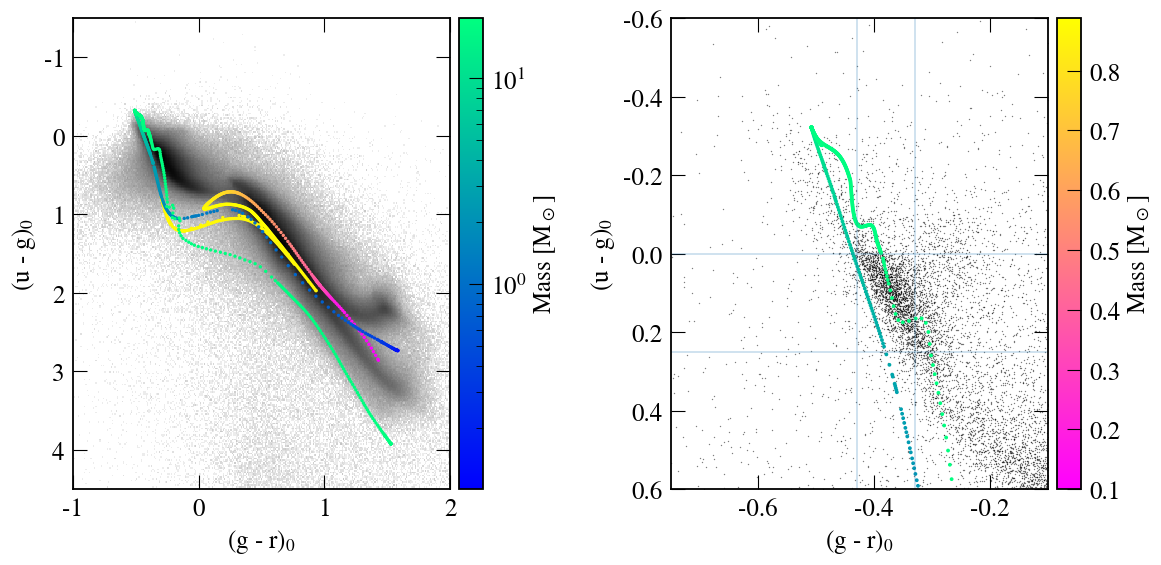

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

plt.sca(ax[0])
plt.hist2d(t['gmag'][ind_finite]- t['rmag'][ind_finite], t['umag'][ind_finite]-0.3 - t['gmag'][ind_finite], 
           bins=(np.linspace(-1,2,300),np.linspace(-1.5,4.5,300)), norm=mpl.colors.LogNorm(), cmap='binary')

plt.scatter(iso_sdss_old['SDSS_g']-iso_sdss_old['SDSS_r'], iso_sdss_old['SDSS_u']-iso_sdss_old['SDSS_g'], cmap='spring', s=2, c=iso_sdss_old['star_mass'], zorder=1)
plt.scatter(iso_sdss['SDSS_g']-iso_sdss['SDSS_r'], iso_sdss['SDSS_u']-iso_sdss['SDSS_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=2, c=iso_sdss['star_mass'])

plt.xlim(-1,2)
plt.ylim(4.5,-1.5)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

plt.colorbar(label='Mass [$M_\odot$]', pad=0.02)

ind_mass = (iso['star_mass']>2.5) & (iso['star_mass']<4)


plt.sca(ax[1])
plt.plot(t['gmag'][ind_finite & ind_far]- t['rmag'][ind_finite & ind_far], t['umag'][ind_finite & ind_far] -0.3 - t['gmag'][ind_finite & ind_far] , 
         'ko', ms=1, mew=0, alpha=0.5, zorder=0)

plt.scatter(iso_sdss['SDSS_g']-iso_sdss['SDSS_r'], iso_sdss['SDSS_u']-iso_sdss['SDSS_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=3, 
            c=iso_sdss['star_mass'], zorder=1)

plt.scatter(iso_sdss_old['SDSS_g']-iso_sdss_old['SDSS_r'], iso_sdss_old['SDSS_u']-iso_sdss_old['SDSS_g'], cmap='spring', s=3, 
            c=iso_sdss_old['star_mass'], zorder=1)

# ind_mass = (iso['star_mass']>2) & (iso['star_mass']<4)
# plt.plot(iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], c='cyan')


lw_target = 0.3
plt.axhline(0.25, lw=lw_target)
plt.axhline(0., lw=lw_target)
plt.axvline(-0.33, lw=lw_target)
plt.axvline(-0.43, lw=lw_target)

ind_cc = (t['gmag']-t['rmag']<-0.33) & (t['gmag']-t['rmag']>-0.43) & (t['umag']-t['gmag']<0.25) &(t['umag']-t['gmag']>0.)

plt.xlim(-0.45,-0.1)
plt.ylim(1.4, 0.2)

plt.xlim(-0.57,-0.23)
plt.xlim(-0.75,-0.1)
plt.ylim(0.6, -0.6)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

plt.colorbar(label='Mass [$M_\odot$]', pad=0.02)

plt.tight_layout()
plt.savefig('../plots/ugr_sdss.png')

## SMASH target selection

### Color-color selection box

In [52]:
# crop isochrone to massive stars
ind_mass = (iso['star_mass']>5) & (iso['star_mass']<15)

# fit a line
p_ms = np.polyfit(iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], 1)
poly_ms = np.poly1d(p_ms)

In [81]:
points_ugr = np.array([t['gmag']- t['rmag'], t['umag']-0.3 - t['gmag']]).T

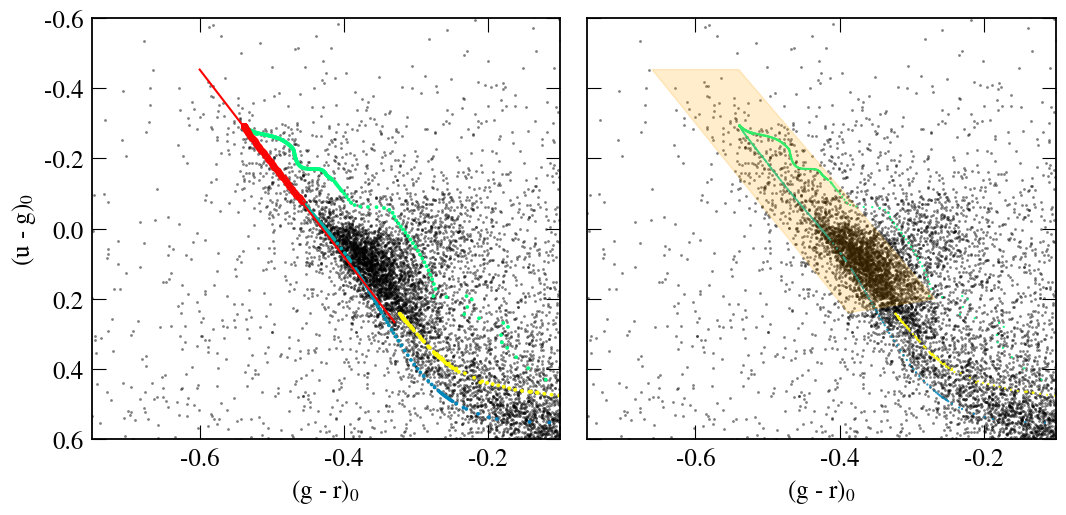

In [83]:
fig, ax = plt.subplots(1,2,figsize=(11,5.5), sharex=True, sharey=True)
for i in range(2):
    plt.sca(ax[i])
    plt.plot(t['gmag'][ind_finite & ind_far]- t['rmag'][ind_finite & ind_far], t['umag'][ind_finite & ind_far]-0.3 - t['gmag'][ind_finite & ind_far], 
             'ko', ms=2, mew=0, alpha=0.5, zorder=0)
    
plt.sca(ax[0])
plt.plot(iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], 'o', mfc='none', mec='r', ms=4)

plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_u']-iso['DECam_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=3, c=iso['star_mass'], zorder=1)
plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_u']-iso_old['DECam_g'], cmap='spring', s=3, c=iso_old['star_mass'], zorder=1)


x_ = np.linspace(-0.6,-0.33,100)
y_ = poly_ms(x_)
plt.plot(x_, y_, 'r-')

plt.xlim(-0.75,-0.1)
plt.ylim(0.6, -0.6)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

plt.sca(ax[1])

plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_u']-iso['DECam_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=0.3, c=iso['star_mass'], zorder=1)
plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_u']-iso_old['DECam_g'], cmap='spring', s=0.3, c=iso_old['star_mass'], zorder=1)

dx = 0.06
dx2 = 0.06
dy2 = -0.04
vert_ugr = np.array([[-0.6-dx, poly_ms(-0.6)], [-0.6+dx, poly_ms(-0.6)], [-0.34+1.2*dx2, poly_ms(-0.34)+dy2], [-0.34-0.8*dx2, poly_ms(-0.34)]])

path_ugr = mpl.path.Path(vert_ugr)
ind_ugr = path_ugr.contains_points(points_ugr)

# plt.plot(vert_ugr[:,0], vert_ugr[:,1], 'ro')
pm = mpl.patches.Polygon(vert_ugr, color='orange', alpha=0.2, zorder=2, label='')
plt.gca().add_artist(pm)


plt.xlabel('(g - r)$_0$')

plt.tight_layout()

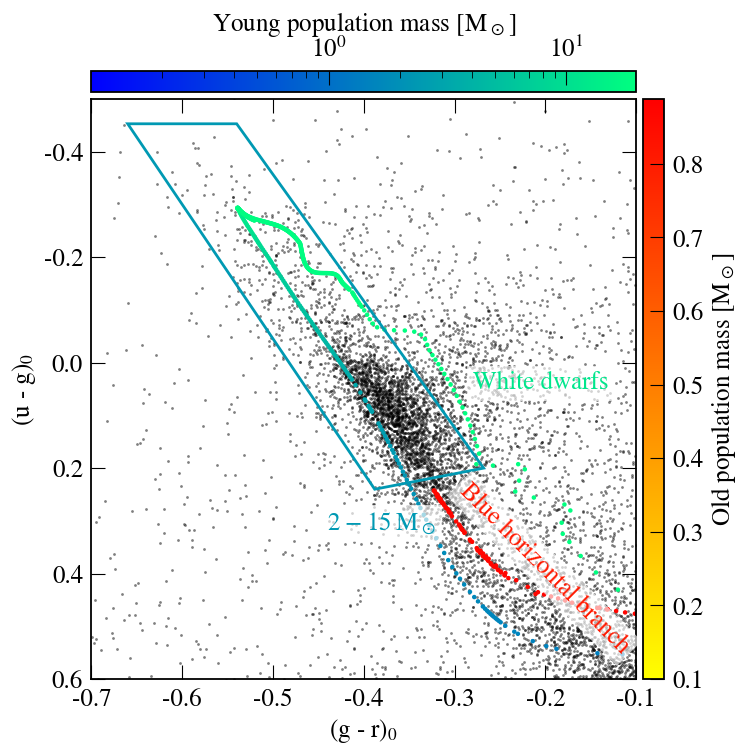

In [87]:
fig = plt.figure(figsize=(7,7))
plt.plot(t['gmag'][ind_finite & ind_far]- t['rmag'][ind_finite & ind_far], t['umag'][ind_finite & ind_far]-0.3 - t['gmag'][ind_finite & ind_far] , 
         'ko', ms=2, mew=0, alpha=0.5, zorder=0)

imy = plt.scatter(iso['DECam_g']-iso['DECam_r'], iso['DECam_u']-iso['DECam_g'], cmap='winter', norm=mpl.colors.LogNorm(), s=5, c=iso['star_mass'], zorder=1)

imo = plt.scatter(iso_old['DECam_g']-iso_old['DECam_r'], iso_old['DECam_u']-iso_old['DECam_g'], cmap='autumn_r', s=5, c=iso_old['star_mass'], zorder=1)

ind_mass = (iso['star_mass']>2) & (iso['star_mass']<4)
# plt.plot(iso['DECam_g'][ind_mass]-iso['DECam_r'][ind_mass], iso['DECam_u'][ind_mass]-iso['DECam_g'][ind_mass], c='r')

text_bg = dict(facecolor='white', edgecolor='none', alpha=0.65)
plt.text(-0.28, 0.05, 'White dwarfs', color=mpl.cm.winter(0.9), bbox=text_bg)
plt.text(-0.3, 0.22, 'Blue horizontal branch', rotation=-45., color=mpl.cm.autumn_r(0.9), va='top', bbox=text_bg)
plt.text(-0.38, 0.28, '$2-15\,M_\odot$', color=mpl.cm.winter(0.6), ha='center', va='top', bbox=text_bg)

lw_target = 0.3
# plt.axhline(0.25, lw=lw_target)
# plt.axhline(0., lw=lw_target)
# plt.axvline(-0.33, lw=lw_target)
# plt.axvline(-0.43, lw=lw_target)
# p_rect = mpl.patches.Rectangle((-0.43,0.), 0.1, 0.25, fc='none', ec=mpl.cm.winter(0.6), lw=2)
# plt.gca().add_patch(p_rect)

pm = mpl.patches.Polygon(vert_ugr, fc='none', ec=mpl.cm.winter(0.6), lw=2)
plt.gca().add_artist(pm)


# ind_cc = (t['gmag']-t['rmag']<-0.33) & (t['gmag']-t['rmag']>-0.43) & (t['umag']-t['gmag']<0.25) &(t['umag']-t['gmag']>0.)

plt.xlim(-0.7,-0.1)
plt.ylim(0.6, -0.5)

plt.xlabel('(g - r)$_0$')
plt.ylabel('(u - g)$_0$')

# colorbars
plt.tight_layout()
bbox = plt.gca().get_position()

# top
cax_top = fig.add_axes([bbox.x0, bbox.y1 + 0.01, bbox.width, 0.03])
plt.colorbar(imy, cax=cax_top, label='Young population mass [$M_\odot$]', orientation='horizontal', location='top')

# right
cax_right = fig.add_axes([bbox.x1+0.01, bbox.y0, 0.03, bbox.height])
plt.colorbar(imo, cax=cax_right, label='Old population mass [$M_\odot$]')

plt.savefig('../plots/ugr_selection.png')

### Sky selection

In [90]:
# smash stars coordinates
cg = coord.Galactic(l=t['glon']*u.deg, b=t['glat']*u.deg)
ceq = cg.transform_to(coord.ICRS())
# ceq = coord.SkyCoord(ra=t['ra']*u.deg, dec=t['dec']*u.deg, frame='icrs')

In [91]:
# LMC coordinate
l_lmc = 280.47
b_lmc = -32.89
cg_lmc = coord.Galactic(l=l_lmc*u.deg, b=b_lmc*u.deg)

# SMC coordinate
l_smc = 302.80
b_smc = -44.30
cg_smc = coord.Galactic(l=l_smc*u.deg, b=b_smc*u.deg)

# distances
sep_lmc = cg.separation(cg_lmc)
sep_smc = cg.separation(cg_smc)

In [92]:
# spatial selection
ind_far = (sep_lmc>20*u.deg) & (sep_smc>10*u.deg)

In [93]:
np.sum(ind_ugr & ind_far)

np.int64(469)

### SMASH target table

In [94]:
thvs = Table([ceq.ra[ind_ugr & ind_far], ceq.dec[ind_ugr & ind_far]], names=('ra', 'dec'))
print(len(thvs))

469


## Gaia target selection

In [97]:
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]


User:  abonaca
Password:  ········


INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]


### Cross-match

In [98]:
table_name = 'smash_hvs_obs'
try:
    job = Gaia.delete_user_table(table_name=table_name)
except Exception:
    print(f'Table {table_name} does not exist yet.')
Gaia.upload_table(upload_resource=thvs, table_name=table_name)

500 Error 500:
Can not execute the following SQL: 
DROP TABLE user_abonaca.smash_hvs_obs
Because: ERROR: table "smash_hvs_obs" does not exist
Table smash_hvs_obs does not exist yet.
INFO: Sending pytable. [astroquery.utils.tap.core]
INFO: Uploaded table 'smash_hvs_obs'. [astroquery.utils.tap.core]


In [99]:
# set ra, dec flags to enable crossmatching
full_name = f'user_abonaca.{table_name}'
Gaia.update_user_table(table_name=full_name,
                       list_of_changes=[["ra","flags","Ra"],
                                        ["dec","flags","Dec"]])

INFO: Table 'user_abonaca.smash_hvs_obs' updated. [astroquery.utils.tap.core]


In [120]:
# perform cross-match on the archive
xmatch_name = 'smash_obs_xmatch'
full_xmatch_name = f'user_abonaca.{xmatch_name}'

try:
    job = Gaia.delete_user_table(table_name=xmatch_name)
except Exception:
    print(f'Table {xmatch_name} does not exist yet.')

Gaia.cross_match(full_qualified_table_name_a=full_name,
                 full_qualified_table_name_b='gaiadr3.gaia_source',
                 results_table_name=xmatch_name, radius=0.5)

INFO: Table 'smash_obs_xmatch' deleted. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [125]:
query = (f"SELECT c.separation*3600 AS separation_arcsec, a.*, b.* FROM gaiadr3.gaia_source AS a, "
         f"{full_name} AS b, {full_xmatch_name} AS c WHERE c.gaia_source_source_id = a.source_id AND "
         f"c.{table_name}_{table_name}_oid = b.{table_name}_oid")
job = Gaia.launch_job(query=query)
tgaia = job.get_results()

### Combine tables

In [131]:
# ideally these are all the same...
np.size(np.unique(tgaia['smash_hvs_obs_oid'])), np.size(np.unique(tgaia['source_id'])), len(tgaia), len(thvs)

(441, 441, 442, 469)

In [132]:
# if not, just keep the unique entries...
_, ind_unique = np.unique(tgaia['smash_hvs_obs_oid'], return_index=True)
tgaia = tgaia[ind_unique]

In [133]:
tgaia

separation_arcsec,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,smash_hvs_obs_oid,ra2,dec2
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,deg,deg
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,f

In [254]:
# select matched rows from the SMASH table
tsmash = t[ind_ugr & ind_far][tgaia['smash_hvs_obs_oid']-1]

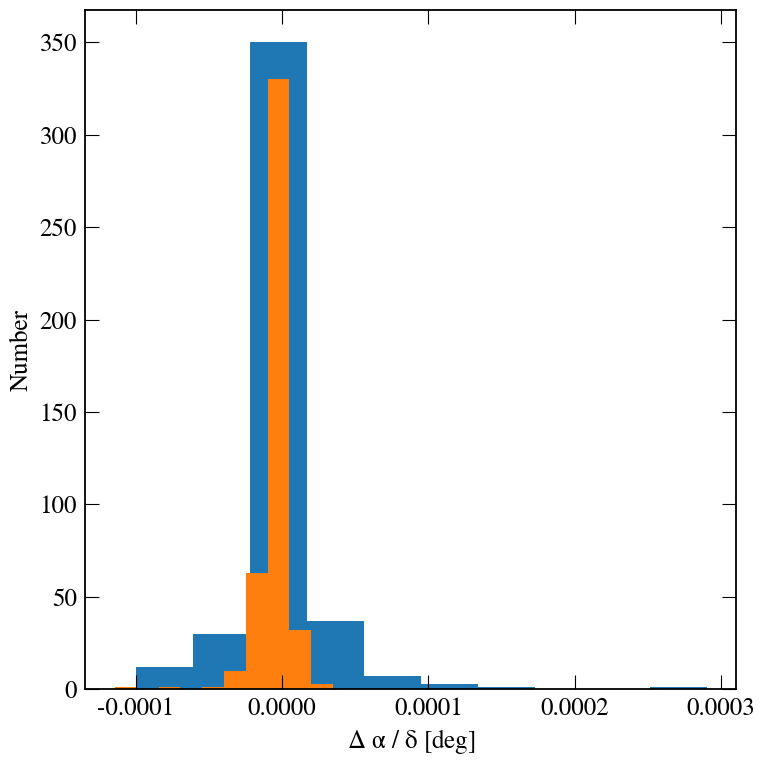

In [255]:
# check order correct
plt.hist(tgaia['ra'] - tsmash['ra'])
plt.hist(tgaia['dec'] - tsmash['dec'])

plt.xlabel('$\Delta$ $\\alpha$ / $\delta$ [deg]')
plt.ylabel('Number')
plt.tight_layout()

In [256]:
# check for overlap in column names
cname_smash = tsmash.colnames
cname_gaia = tgaia.colnames

common = [x for x in cname_smash if x in cname_gaia]
print(common)

# rename smash columns
for cname in common:
    tsmash.rename_column(cname, f'{cname}_smash')

['ra', 'dec']


In [257]:
tout = hstack([tgaia, tsmash])

### Parallax selection

In [258]:
# distance range
g1 = 17.5
g2 = 18.5
Mg_avg = np.mean(iso['DECam_g'][ind_mass])
dm1 = g1 - Mg_avg
dm2 = g2 - Mg_avg
d1 = 10**((dm1 + 5)*0.2)*u.pc
d2 = 10**((dm2 + 5)*0.2)*u.pc

print(d1.to(u.kpc), d2.to(u.kpc))

21.501760179597476 kpc 34.077993334575496 kpc


In [259]:
ind_parallax = (((tout['parallax']-2*tout['parallax_error']<0.15) & (tout['phot_g_mean_mag']<17.2)) | 
                ((tout['parallax']-2*tout['parallax_error']<0.05) & (tout['phot_g_mean_mag']>17.2)))
ind_parallax = tout['parallax']<0.25
# ind_faint = (results['phot_g_mean_mag']>g1) & (results['phot_g_mean_mag']<g2)
# ind_offbridge = (ctg.b>-40*u.deg)
# ind_target = ind_parallax & ind_offbridge
print(np.sum(ind_parallax))

133


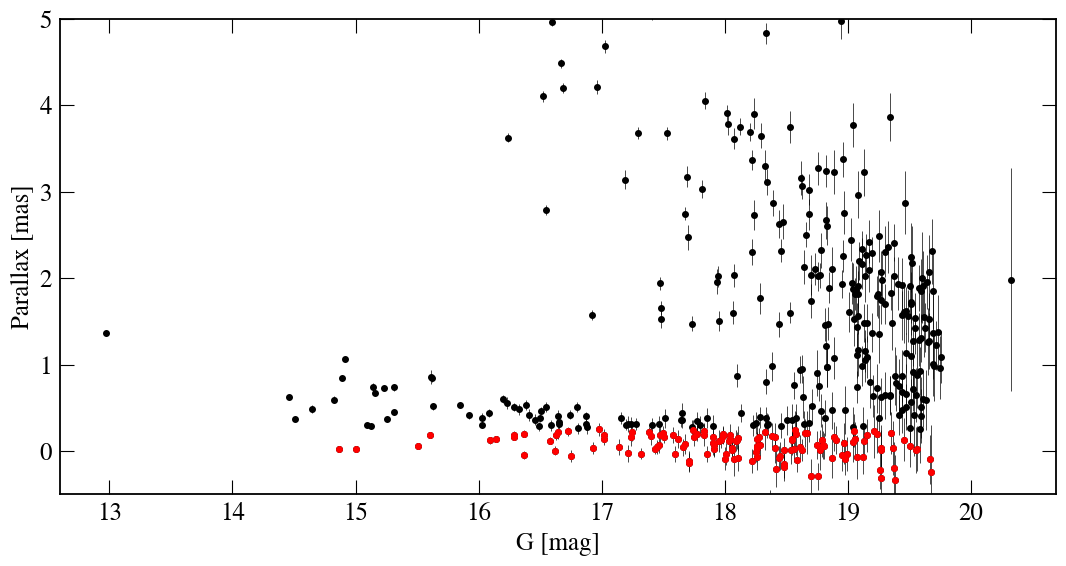

In [260]:
plt.figure(figsize=(11,6))
plt.plot(tout['phot_g_mean_mag'], tout['parallax'], 'ko', ms=4)
plt.plot(tout['phot_g_mean_mag'][ind_parallax], tout['parallax'][ind_parallax], 'ro', ms=4)
plt.errorbar(tout['phot_g_mean_mag'], tout['parallax'], yerr=tout['parallax_error'], fmt='none', color='k', lw=0.5, zorder=0)

plt.ylim(-0.5,5)
plt.xlabel('G [mag]')
plt.ylabel('Parallax [mas]')
plt.tight_layout()

### Proper motions

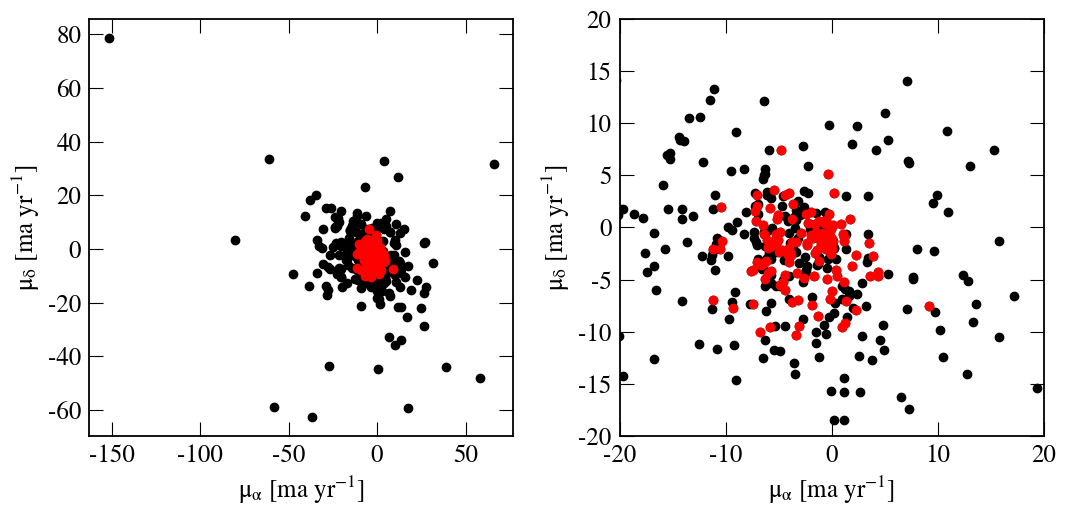

In [261]:
fig, ax = plt.subplots(1,2,figsize=(11,5.5))
plt.sca(ax[0])
plt.plot(tout['pmra'], tout['pmdec'], 'ko')
plt.plot(tout['pmra'][ind_parallax], tout['pmdec'][ind_parallax], 'ro')

plt.xlabel('$\mu_\\alpha$ [ma yr$^{-1}$]')
plt.ylabel('$\mu_\delta$ [ma yr$^{-1}$]')

plt.sca(ax[1])
plt.plot(tout['pmra'], tout['pmdec'], 'ko')
plt.plot(tout['pmra'][ind_parallax], tout['pmdec'][ind_parallax], 'ro')

plt.xlim(-20,20)
plt.ylim(-20,20)

plt.xlabel('$\mu_\\alpha$ [ma yr$^{-1}$]')
plt.ylabel('$\mu_\delta$ [ma yr$^{-1}$]')

plt.tight_layout()

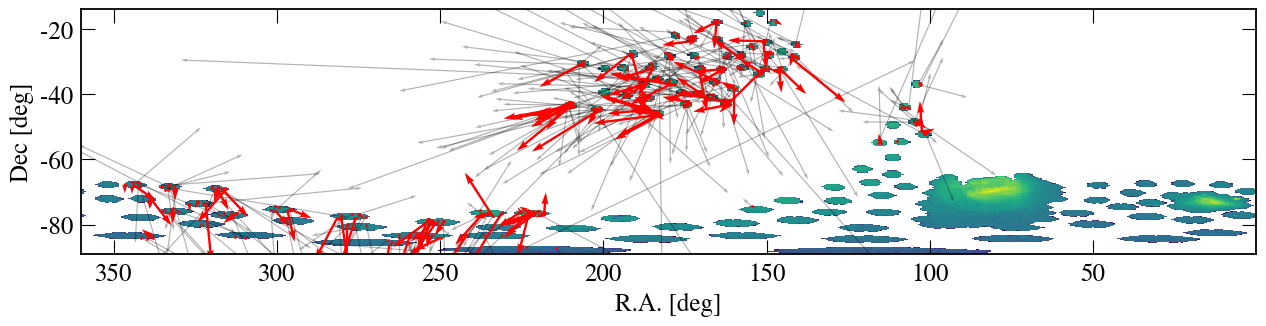

In [262]:
plt.figure(figsize=(13,6))

plt.hist2d(t['ra'], t['dec'], bins=(500,500), norm=mpl.colors.LogNorm());
plt.plot(tout['ra'], tout['dec'], 'ro', ms=1)
plt.quiver(np.array(tout['ra']), np.array(tout['dec']), np.array(tout['pmra']), np.array(tout['pmdec']), color='k', scale=200, width=1e-3, alpha=0.3)
plt.quiver(np.array(tout['ra'][ind_parallax]), np.array(tout['dec'][ind_parallax]), 
           np.array(tout['pmra'][ind_parallax]), np.array(tout['pmdec'][ind_parallax]), color='r', scale=200, width=2e-3)

plt.gca().set_aspect('equal')
plt.gca().invert_xaxis()
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')

plt.tight_layout()

In [263]:
ct = coord.SkyCoord(ra=tout['ra'], dec=tout['dec'])
ctg = ct.transform_to(coord.Galactic())

ind_target = ind_parallax

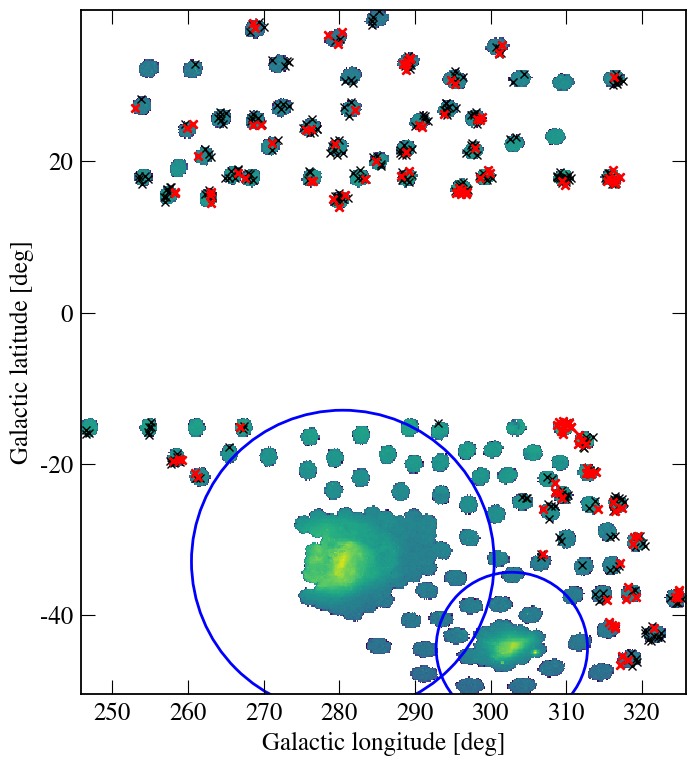

In [264]:
plt.hist2d(t['glon'], t['glat'], bins=(500,500), norm=mpl.colors.LogNorm());
# plt.plot(l_lmc, b_lmc, 'b*')
p_circle = plt.Circle((l_lmc, b_lmc), 20, fc='none', ec='b', lw=2)
plt.gca().add_patch(p_circle)

# plt.plot(l_smc, b_smc, 'm*')
p_circle = plt.Circle((l_smc, b_smc), 10, fc='none', ec='b', lw=2)
plt.gca().add_patch(p_circle)

plt.plot(ctg.l, ctg.b, 'kx', lw=0.5)
plt.plot(ctg.l[ind_target], ctg.b[ind_target], 'rx', mew=2)

plt.gca().set_aspect('equal')

plt.xlabel('Galactic longitude [deg]')
plt.ylabel('Galactic latitude [deg]')
plt.tight_layout()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


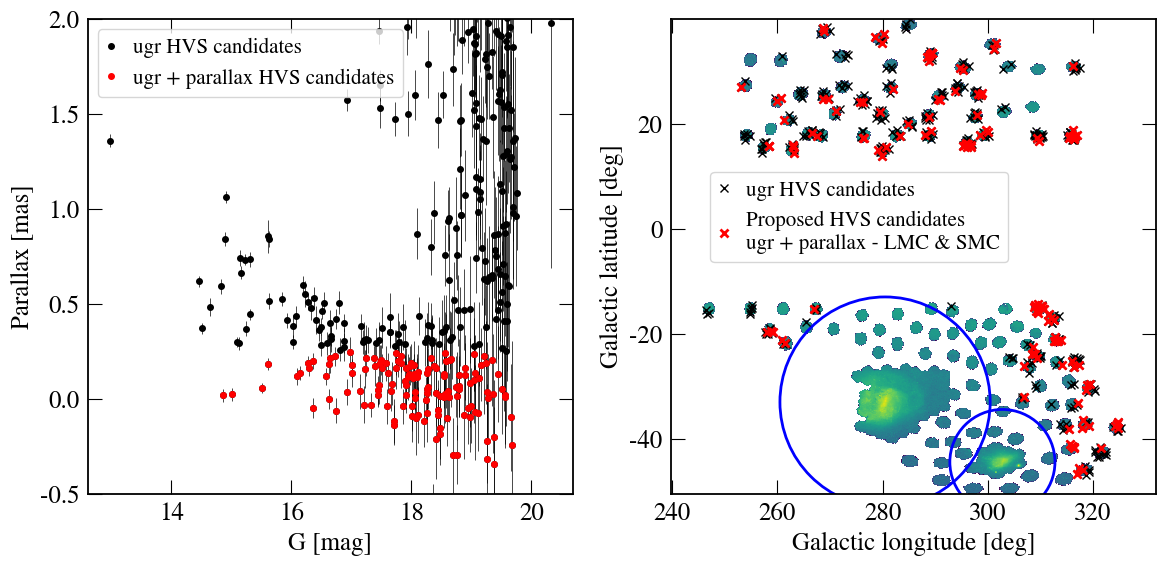

In [265]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

plt.sca(ax[0])
plt.plot(tout['phot_g_mean_mag'], tout['parallax'], 'ko', ms=4, label='ugr HVS candidates')
plt.plot(tout['phot_g_mean_mag'][ind_parallax], tout['parallax'][ind_parallax], 'ro', ms=4, label='ugr + parallax HVS candidates')
plt.errorbar(tout['phot_g_mean_mag'], tout['parallax'], yerr=tout['parallax_error'], fmt='none', color='k', lw=0.5, zorder=0, label='')

plt.ylim(-0.5,2)
plt.xlabel('G [mag]')
plt.ylabel('Parallax [mas]')
plt.legend(loc=2, fontsize='small', handlelength=0.5)

plt.sca(ax[1])
plt.hist2d(t['glon'], t['glat'], bins=(500,500), norm=mpl.colors.LogNorm());
p_circle = plt.Circle((l_lmc, b_lmc), 20, fc='none', ec='b', lw=2)
plt.gca().add_patch(p_circle)

p_circle = plt.Circle((l_smc, b_smc), 10, fc='none', ec='b', lw=2)
plt.gca().add_patch(p_circle)

plt.plot(ctg.l, ctg.b, 'kx', lw=0.5, label='ugr HVS candidates')
plt.plot(ctg.l[ind_target], ctg.b[ind_target], 'rx', mew=2, label='Proposed HVS candidates\nugr + parallax - LMC & SMC')

plt.legend(fontsize='small', handlelength=0.5, bbox_to_anchor=(0.06,0.7), loc=2)
plt.gca().set_aspect('equal', adjustable='datalim')

plt.xlabel('Galactic longitude [deg]')
plt.ylabel('Galactic latitude [deg]')
plt.tight_layout()
# plt.savefig('../scientific_justification/sample.pdf')

In [266]:
ind_mag = (tout['phot_g_mean_mag']>17.5) & (tout['phot_g_mean_mag']<18.5)
print(np.sum(ind_mag & ind_parallax), np.sum(ind_parallax))

53 133


## Output table

In [267]:
ttarget = tout[ind_target]
ind_sort = np.argsort(ttarget['ra'])
ttarget = ttarget[ind_sort]

In [268]:
ttarget

separation_arcsec,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,smash_hvs_obs_oid,ra2,dec2,glon,glat,elon,elat,ring256,htm9,nest4096,random_id,decscatter,rascatter,id,ra_smash,dec_smash,raerr,decerr,ndet,depthflag,umag,uerr,uscatter,ndetu,gmag,gerr,gscatter,ndetg,rmag,rerr,rscatter,ndetr,imag,ierr,iscatter,ndeti,zmag,zerr,zscatter,ndetz,chi,sharp,flag,prob,ebv
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,

In [269]:
for name in ttarget.colnames:
    col = ttarget[name]
    print(f"{name:20s} dtype: {col.dtype} type: {type(col[0])} shape: {col.shape}")

separation_arcsec    dtype: float64 type: <class 'numpy.float64'> shape: (133,)
solution_id          dtype: int64 type: <class 'numpy.int64'> shape: (133,)
designation          dtype: object type: <class 'str'> shape: (133,)
source_id            dtype: int64 type: <class 'numpy.int64'> shape: (133,)
random_index         dtype: int64 type: <class 'numpy.int64'> shape: (133,)
ref_epoch            dtype: float64 type: <class 'numpy.float64'> shape: (133,)
ra                   dtype: float64 type: <class 'numpy.float64'> shape: (133,)
ra_error             dtype: float32 type: <class 'numpy.float32'> shape: (133,)
dec                  dtype: float64 type: <class 'numpy.float64'> shape: (133,)
dec_error            dtype: float32 type: <class 'numpy.float32'> shape: (133,)
parallax             dtype: float64 type: <class 'numpy.float64'> shape: (133,)
parallax_error       dtype: float32 type: <class 'numpy.float32'> shape: (133,)
parallax_over_error  dtype: float32 type: <class 'numpy.float32

In [270]:
ttarget.remove_columns(['designation', 'phot_variable_flag', 'libname_gspphot'])
ttarget.write('../data/hvs_targets.fits', overwrite=True)

### Coordinates formatted to check airmasses

In [248]:
ra_str = ct.ra.to_string(unit=u.hourangle, sep=':', precision=2)[ind_target & ind_mag]
dec_str = ct.dec.to_string(sep=':', precision=2, alwayssign=True)[ind_target & ind_mag]

In [250]:
ind_sort_out = np.argsort(ct.ra.value[ind_target & ind_mag])
ra_str = ra_str[ind_sort_out]
dec_str = dec_str[ind_sort_out]

In [251]:
for ra, dec in zip(ra_str, dec_str):
    print(f"{ra} {dec}")

9:29:08.37 -28:59:17.05
9:48:41.50 -17:40:29.87
10:00:32.70 -23:48:51.83
10:05:44.94 -33:26:24.79
10:29:13.99 -28:26:02.39
10:32:35.68 -28:54:04.13
10:52:41.80 -32:20:29.73
11:03:42.73 -35:35:55.39
11:10:52.63 -41:21:33.19
11:22:07.86 -39:38:25.53
11:27:28.85 -22:13:04.41
11:34:06.06 -22:19:29.33
11:34:24.02 -42:38:37.88
11:42:55.21 -39:42:33.80
11:56:49.37 -37:05:18.11
11:57:29.89 -28:30:03.49
11:58:26.71 -28:06:49.03
12:00:22.19 -27:56:54.97
12:00:22.26 -27:55:32.68
12:00:23.38 -27:55:21.96
12:09:08.76 -46:27:09.24
12:16:57.43 -46:44:41.28
12:18:34.60 -31:39:45.83
12:29:58.38 -37:02:07.16
12:31:59.38 -37:11:41.69
12:34:17.48 -43:55:18.38
12:44:39.94 -28:31:30.15
13:26:33.76 -45:04:53.42
13:58:49.33 -43:24:36.66
13:59:50.95 -42:18:43.18
14:00:36.08 -43:34:34.54
14:03:27.01 -43:15:51.22
14:05:27.91 -42:55:30.05
14:32:25.50 -76:08:59.97
14:39:03.09 -75:46:17.31
14:44:35.40 -77:02:21.05
14:48:07.48 -76:59:47.65
14:49:40.23 -75:48:42.72
14:50:46.62 -76:01:41.44
14:53:05.28 -77:18:29.77
15